## Observations and Insights 

From Table 1:
1. The merging of mouse metadata and study results data produced a dataframe that was the size of the study results data, 1893 rows and 8 columns.
2. There were multiple tumor volume entries for each mouse and it was appropriate to isolate the useful data
3. The merging of both data created a bigger dataframe suitable for the study

From Table 2:
1. The mouse with ID g989 was identified as the duplicate mouse since it was entered in duplicate timepoints. 
2. Isolating the duplicate mouse helped to ensure the dataframe is ready for cleaning to remove these duplicates
3. Data entry is an error source that must be closely monitored for data integrity.
4. There were 13 duplicate entries for Mouse with ID g989

From Table 3:
1. New cleaned dataframe becomes the dataframe for the analysis.
2. The dataframe had 1880 rows with same 8 columns, with unwanted data removed.
3. through evaluating data from the Mouse ID and Timepoint columns which showed that the mice with g989

Summary Statistics
1.	The first table calculated and presented with the groupby method was much easier to format and present than the table with the one-line aggregating of the mean, median, variance, standard deviation, and SEM of the tumor volume.
2.	The standard error of the mean (SEM) was averaging about 50% which means if is not very representative of the overall population. The smaller the SEM, the less the spread and the more likely it is that the sample mean is close to the population mean. But our SEM here for all regimens was around 0.5.
3.	Groupby sorts the index columsn alphabethically which presents the data in a much better fashion.

Bar and Pie Charts
1.	Plotting the bar plot using pandas has more allowance more capacity for producing a better plot with more user-friendly options to modify the presentation of the bar plot over plotting with pyplot.
2.	In both bar plots, i.e. plotting with pandas and with pyplot, the measurements with Capomulin and Ramicane had the most measurements in the dataset. 
3.	The table showing the calculation of the final tumor volume for each mouse across the four treatment regimen did not allow the fomating the data in the Tumor Volume column without impacting the subsequent analysis generating the boxplot. Trying to round the numbers to 2 decimal places was not allowing the boxplots to show. I had to leave it without rounding the column numbers.
4.	The pie plots with the pandas module gives much more room for improving the presentation of the plot that the pie plot with pyplot.
5.	The distribution of the sexes of the mice for the study or treatment was near even, 51% for male mice and 49% for female mice.
6.  Capomulin and Ramicane appear to be the drugs of greatest interest as more measurement counts went to these drugs.

Quartiles, Outliers and Boxplots
1.	The first table in this section created a dataframe around the treatment of all 248 mice with the four regimens - Capomulin, Ramicane, Infubinol, and Ceftamin
2.	Only the Infubinol had an outlier at about 36mm3, and all the averages for each treatment regimen, fall within the acceptable ranges for each treatment regimen.
3.	Infubinol and Ceftamin appear to relate with the highest tumor volumes for the mice 
4.  Capomulin appears to be the drug of interest given by its highest measurement counts.

Line and Scatter plots
1.	The line plot shows that as the timepoint increases, the tumor volume reduces, possibly as an effect of the Capomulin regimen i.e. the tumor shrinks over time with Capomulin.
2.	The scatter plot shows a correlation between the weight of the mice upon which the Capomulin regimen was applied in a positive correlation relationship. Weight gain shows the mice are getting better from the Capomulin treatment.
3.	Obtaining a feasible interpretation of the line plot was very difficult especially as the data disperses in the plot. 

Correlation and Regression
1.	The correlation coefficient between the mouse weight and the average tumor volume is 0.84, showing that there is almost perfect correlation (84%) as the coefficient is almost one (1). 
2.	The linear regression model also shows close correlation between the weight and the tumor volume. This implies that the tumor size is bigger with increased weight. A weight reduction therefore can potentially reduce tumor size
3.	From the slope of the scatter plot, it’s obvious that the slope is 0.95, and positive y-intercept at 21.55, showing that the correlation between the weight and the average tumor size is positively correlated.
4.	The r-score showed 0.71 which is almost perfect correlation between the weight and the average tumor size

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_stdy_df = pd.merge(study_results,mouse_metadata, on='Mouse ID', how='right')

# Display the data table for preview
mouse_stdy_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [2]:
# Checking the number of mice.
mice_num_unq = len(mouse_stdy_df["Mouse ID"].unique())

# Putting mice count into dataframe
mice_num_cnt = pd.DataFrame([{"Number of mice ": mice_num_unq}])

# Number of mice count
mice_num_cnt

,Number of mice
0,249


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dupl_mice = mouse_stdy_df.loc[mouse_stdy_df.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()

mice_dupl_id = pd.DataFrame([{"ID number of duplicate mice ": dupl_mice}])
mice_dupl_id

,ID number of duplicate mice
0,[g989]


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_mice_data = mouse_stdy_df.loc[mouse_stdy_df['Mouse ID']=='g989']

# Output dataframe with data for the duplicate mouse ID

dup_mice_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cln_mouse_data = mouse_stdy_df[mouse_stdy_df['Mouse ID'].isin(dupl_mice)==False]

# Output for mice ID with dropped duplicates
cln_mouse_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [6]:
# Checking the number of mice in the clean DataFrame.
mice_clean_unq = len(cln_mouse_data["Mouse ID"].unique())

# Putting clean mice number into dataframe
mice_clean_df = pd.DataFrame([{"Number of mice in clean dataframe ": mice_clean_unq}])

# Outputing number of mice in cleaned dataframe
mice_clean_df

,Number of mice in clean dataframe
0,248


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

regim_mean_df = cln_mouse_data.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
regim_med_df = cln_mouse_data.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
regim_var_df = cln_mouse_data.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
regim_stdv_df = cln_mouse_data.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
regim_sem_df = cln_mouse_data.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]
regim_cnt_df = cln_mouse_data.groupby(["Drug Regimen"]).count()["Tumor Volume (mm3)"]

# Assemble the resulting series into a single summary dataframe.
sum_stats_df = pd.DataFrame({"Mean Tumor Volume (mm3) ": regim_mean_df,
                            "Median Tumor Volume (mm3) ": regim_med_df,
                            "Variance of Tumor Volume (mm3) ": regim_var_df,
                            "Standard Deviation of Tumor Vol. (mm3) ": regim_stdv_df,
                            "Standard Error of Mean (SEM) of Tumor Vol. (mm3) ": regim_sem_df,
                            "Total Count of Tumor Measurements ": regim_cnt_df})

# Format columns in output dataframe
sum_stats_df["Mean Tumor Volume (mm3) "] = sum_stats_df["Mean Tumor Volume (mm3) "].map("{:.2f}".format)
sum_stats_df["Median Tumor Volume (mm3) "] = sum_stats_df["Median Tumor Volume (mm3) "].map("{:.2f}".format)
sum_stats_df["Variance of Tumor Volume (mm3) "] = sum_stats_df["Variance of Tumor Volume (mm3) "].map("{:.2f}".format)
sum_stats_df["Standard Deviation of Tumor Vol. (mm3) "] = sum_stats_df["Standard Deviation of Tumor Vol. (mm3) "].map("{:.2f}".format)
sum_stats_df["Standard Error of Mean (SEM) of Tumor Vol. (mm3) "] = sum_stats_df["Standard Error of Mean (SEM) of Tumor Vol. (mm3) "].map("{:.2f}".format)
sum_stats_df["Total Count of Tumor Measurements "] = sum_stats_df["Total Count of Tumor Measurements "].map("{:.2f}".format)

# Output dataframe
sum_stats_df

,Mean Tumor Volume (mm3),Median Tumor Volume (mm3),Variance of Tumor Volume (mm3),Standard Deviation of Tumor Vol. (mm3),Standard Error of Mean (SEM) of Tumor Vol. (mm3),Total Count of Tumor Measurements
Drug Regimen,,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33,230.00
Ceftamin,52.59,51.78,39.29,6.27,0.47,178.00
Infubinol,52.88,51.82,43.13,6.57,0.49,178.00
Ketapril,55.24,53.70,68.55,8.28,0.60,188.00
Naftisol,54.33,52.51,66.17,8.13,0.60,186.00
Placebo,54.03,52.29,61.17,7.82,0.58,181.00
Propriva,52.32,50.45,43.85,6.62,0.54,148.00
Ramicane,40.22,40.67,23.49,4.85,0.32,228.00
Stelasyn,54.23,52.43,59.45,7.71,0.57,181.00


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line

mice_sum_gpd_df = cln_mouse_data.groupby("Drug Regimen").agg({"Tumor Volume (mm3)": ['mean','median','var','std','sem','count']})

# Assigning new columns names
mice_sum_gpd_df = mice_sum_gpd_df.rename(columns={'mean':"Mean Values",
                                                  'median':"Median Values",
                                                  'var':"Variance",'std':"Standard Deviation",
                                                  'sem':"Standard Error of Mean",'count':"Counts"})

# Tried formatting columns data but it was not registering
mice_sum_gpd_df["Tumor Volume (mm3)"]["Mean Values"] = mice_sum_gpd_df["Tumor Volume (mm3)"]["Mean Values"].map("{:.2f}".format)
mice_sum_gpd_df["Tumor Volume (mm3)"]["Median Values"] = mice_sum_gpd_df["Tumor Volume (mm3)"]["Median Values"].map("{:.2f}".format)
mice_sum_gpd_df["Tumor Volume (mm3)"]["Standard Deviation"] = mice_sum_gpd_df["Tumor Volume (mm3)"]["Standard Deviation"].map("{:.2f}".format)
mice_sum_gpd_df["Tumor Volume (mm3)"]["Standard Error of Mean"] = mice_sum_gpd_df["Tumor Volume (mm3)"]["Standard Error of Mean"].map("{:.2f}".format)
mice_sum_gpd_df["Tumor Volume (mm3)"]["Counts"] = mice_sum_gpd_df["Tumor Volume (mm3)"]["Counts"].map("{:.2f}".format)

# Outputing dataframe for presentation
mice_sum_gpd_df

Tumor Volume (mm3)                                              \
                    Mean Values Median Values   Variance Standard Deviation   
Drug Regimen                                                                  
Capomulin             40.675741     41.557809  24.947764           4.994774   
Ceftamin              52.591172     51.776157  39.290177           6.268188   
Infubinol             52.884795     51.820584  43.128684           6.567243   
Ketapril              55.235638     53.698743  68.553577           8.279709   
Naftisol              54.331565     52.509285  66.173479           8.134708   
Placebo               54.033581     52.288934  61.168083           7.821003   
Propriva              52.320930     50.446266  43.852013           6.622085   
Ramicane              40.216745     40.673236  23.486704           4.846308   
Stelasyn              54.233149     52.431737  59.450562           7.710419   
Zoniferol             53.236507     51.818479  48.533355           6.966589   

                                            
             Standard Error of Mean Counts  
Drug Regimen                                
Capomulin                  0.329346    230  
Ceftamin                   0.469821    178  
Infubinol                  0.492236    178  
Ketapril                   0.603860    188  
Naftisol                   0.596466    186  
Placebo                    0.581331    181  
Propriva                   0.544332    148  
Ramicane                   0.320955    228  
Stelasyn                   0.573111    181  
Zoniferol                  0.516398    182

## Bar and Pie Charts

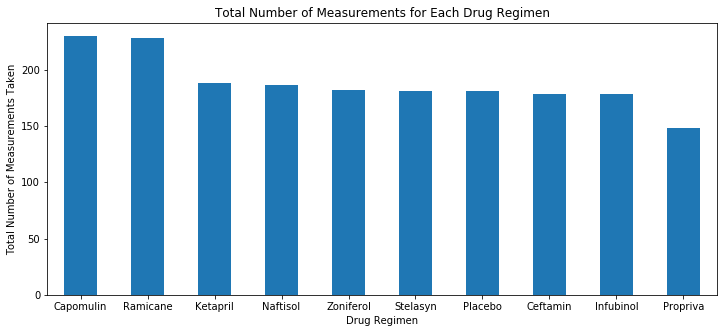

In [9]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

msrmt_counts = cln_mouse_data['Drug Regimen'].value_counts()
msrmt_counts.plot(kind='bar', figsize=(12,5))
plt.xlabel("Drug Regimen")
plt.ylabel("Total Number of Measurements Taken")
plt.xticks(rotation=0, horizontalalignment='center')
plt.title("Total Number of Measurements for Each Drug Regimen")
plt.show()


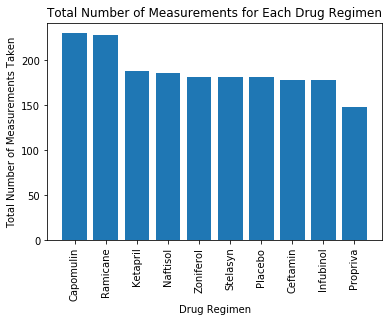

<Figure size 1440x360 with 0 Axes>

In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
msrmt_counts_1 = cln_mouse_data['Drug Regimen'].value_counts()
plt.bar(msrmt_counts_1.index.values, msrmt_counts_1.values)
plt.xticks(rotation=90)
plt.xlabel("Drug Regimen")
plt.ylabel("Total Number of Measurements Taken")
plt.title("Total Number of Measurements for Each Drug Regimen")
figure = plt.figure(figsize=(20,5))
plt.show()

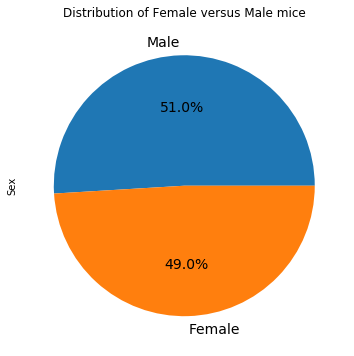

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sex_check_df = cln_mouse_data.loc[:,['Sex']]
sex_cnt_df = sex_check_df['Sex'].value_counts()
plt.title('Distribution of Female versus Male mice')
sex_cnt_df.plot(kind='pie', autopct='%1.1f%%', figsize=(6,6), fontsize=14)

Text(0.5, 1.0, 'Distribution of Female versus Male mice')

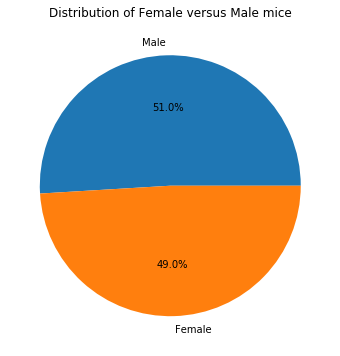

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_check_df = cln_mouse_data.loc[:,['Sex']]
sex_cnt_df = sex_check_df['Sex'].value_counts()
plt_labels = 'Male', 'Female'
plt.figure(figsize=(6,6))
plt.pie(sex_cnt_df.values,labels=plt_labels, autopct='%1.1f%%')
plt.title('Distribution of Female versus Male mice')

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_tumor = cln_mouse_data.groupby(['Mouse ID']).max()
max_tumor = max_tumor.reset_index()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_data = max_tumor[["Mouse ID","Timepoint"]].merge(cln_mouse_data, on=["Mouse ID", "Timepoint"], how='left')

# Outputing the dataframe for presentation
merged_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
trtmts_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in trtmts_list:   
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_vol = merged_data.loc[merged_data["Drug Regimen"]==drug, "Tumor Volume (mm3)"]
    
    # add subset 
    tumor_vol_list.append(final_tumor_vol)
    quartiles = final_tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)         

    outliers = final_tumor_vol.loc[(final_tumor_vol < lower_bound) | (final_tumor_vol > upper_bound)]
    print(f"{drug}'s potential outliers are: {outliers}")

Capomulin's potential outliers are: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers are: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers are: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers are: Series([], Name: Tumor Volume (mm3), dtype: float64)


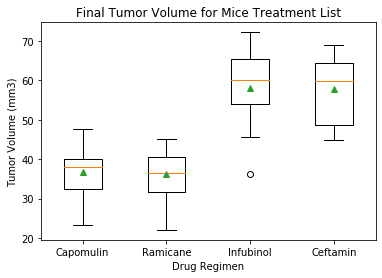

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume for Mice Treatment List')
ax1.set_xlabel('Drug Regimen')
ax1.set_ylabel('Tumor Volume (mm3)')
plt.boxplot(tumor_vol_list, labels=trtmts_list, showmeans=True)
plt.show()

In [16]:
# Using this cell generate a mouse identity for the Line and Scatter Plot in the next cell.
# I couldn't figure out a way to feed the random item into the next cell, but I hope this can suffice.
capom_sng_data_df = cln_mouse_data.loc[ cln_mouse_data["Drug Regimen"] == 'Capomulin']
sample_df = capom_sng_data_df['Mouse ID'].sample()

# Input this product of this into the next cell
sample_df

3    b128
Name: Mouse ID, dtype: object

## Line and Scatter Plots

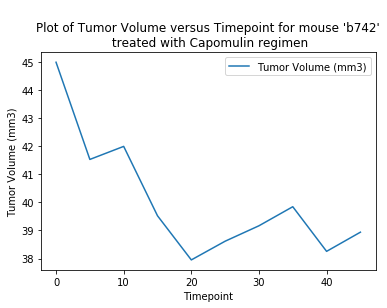

In [17]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
# The Mouse ID from the previous cell can also be used to entry into Mouse ID in this next line, but currently using 'b742'
cap_sng_dat_df = capom_sng_data_df.loc[capom_sng_data_df['Mouse ID'] == 'b742'] # The mouse ID from previous cell can also be used in replacement of 'b742'
cap_sng_dat_df.plot.line(y="Tumor Volume (mm3)", x="Timepoint")
plt.title("\nPlot of Tumor Volume versus Timepoint for mouse 'b742'\n treated with Capomulin regimen")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

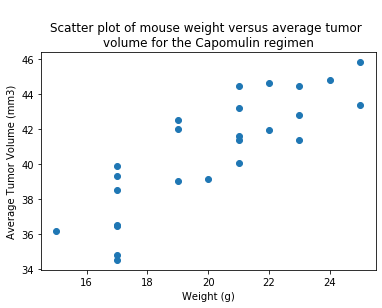

In [18]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_sctt_df = cln_mouse_data.loc[cln_mouse_data["Drug Regimen"] =='Capomulin']
wgt_gp_df_1 = capomulin_sctt_df.groupby(['Mouse ID']).mean()
plt.scatter(wgt_gp_df_1['Weight (g)'],wgt_gp_df_1['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('\nScatter plot of mouse weight versus average tumor \nvolume for the Capomulin regimen')
plt.show()

In [19]:
wgt_gp_df_1

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Age_months,Weight (g)
Mouse ID,,,,,
b128,22.5,41.963636,0.70,9.0,22.0
b742,22.5,40.083699,0.00,7.0,21.0
f966,10.0,36.505973,0.00,16.0,17.0
g288,22.5,41.990097,0.80,3.0,19.0
g316,22.5,44.613344,1.00,22.0,22.0
i557,22.5,44.805810,0.20,1.0,24.0
i738,22.5,39.141053,0.60,23.0,20.0
j119,22.5,44.465236,0.60,7.0,23.0
j246,17.5,43.216925,0.25,21.0,21.0


## Correlation and Regression

The correlation coeff. between both Mouse Weight and Average Tumor Volume for the Capomulin regimen is 0.84

The r-squared value is: 0.7088568047708717


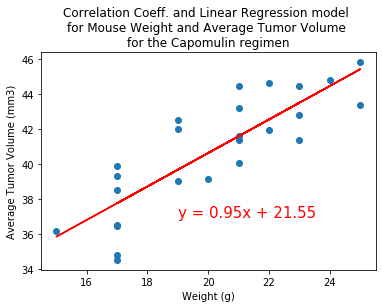

In [20]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
mouse_wt = wgt_gp_df_1.iloc[:,4]
av_tumor_vol = wgt_gp_df_1.iloc[:,1]
correlation = st.pearsonr(mouse_wt,av_tumor_vol)
print(f"The correlation coeff. between both Mouse Weight and Average Tumor Volume for the Capomulin regimen is {round(correlation[0],2)}\n")

x_values = wgt_gp_df_1['Weight (g)']
y_values = wgt_gp_df_1['Tumor Volume (mm3)']
(slope, intercept, r_value, p_value, std_err) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(19,37),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
print(f"The r-squared value is: {r_value**2}")
plt.title('Correlation Coeff. and Linear Regression model \nfor Mouse Weight and Average Tumor Volume \nfor the Capomulin regimen')
plt.show()